In [1]:
using Distributions
using StatsPlots
using StatsBase

using StatRethink

# Easy problems

Code 3.27

In [82]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
cat = Categorical(posterior)
samples = p_grid[rand(cat, 10000)];

Solutions

In [98]:
println("3E1: ", sum(posterior[p_grid .< 0.2]))
println("3E2: ", sum(posterior[p_grid .> 0.8]))
println("3E3: ", sum(posterior[0.2 .< p_grid .< 0.8]))

c = cumsum(posterior);
println("3E4: ", p_grid[findfirst(c .> 0.2)])
println("3E5: ", p_grid[findfirst(c .> 0.8)])
println("3E6: ", hpdi(samples, alpha=0.34))
b = [p_grid[findfirst(c .> 0.34/2)], p_grid[findfirst(c .> 0.34/2 + 0.66)]]
println("3E7: ", b)

3E1: 0.000856095129421848
3E2: 0.12034491402214352
3E3: 0.8787989908484344
3E4: 0.5165165165165165
3E5: 0.7607607607607607
3E6: [0.5235235235235235, 0.7947947947947948]
3E7: [0.4984984984984985, 0.7747747747747747]


# Medium problems

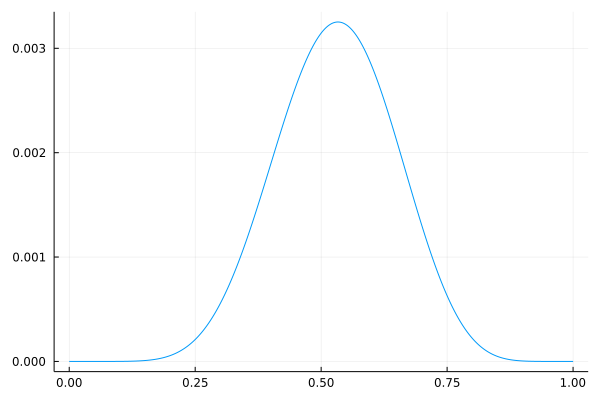

In [14]:
# 3M1
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(15, p), 8) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
plot(p_grid, posterior; legend=false)

HPDI(90%): [0.33633633633633636, 0.7207207207207207]


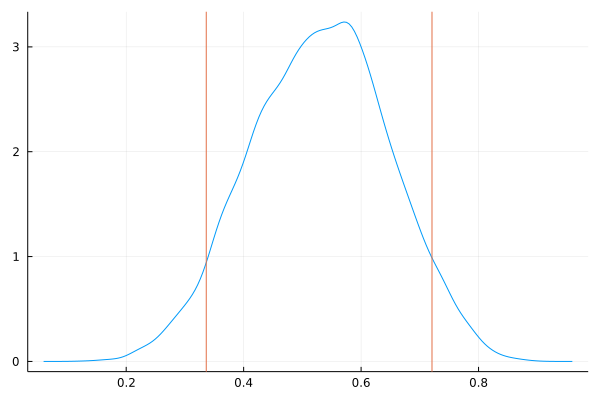

In [27]:
# 3M2
cat = Categorical(posterior)
samples = p_grid[rand(cat, 10_000)];
h = hpdi(samples, alpha=0.1)
println("HPDI(90%): ", h)
density(samples)
vline!(h; legend=false)

In [28]:
# validation
hi1, hi2 = findfirst(p_grid .> h[1]), findfirst(p_grid .> h[2])
c = cumsum(posterior)
c[hi1], c[hi2]

(0.054226253549914734, 0.9508075301347176)

Probability of 8 waters is 0.1429


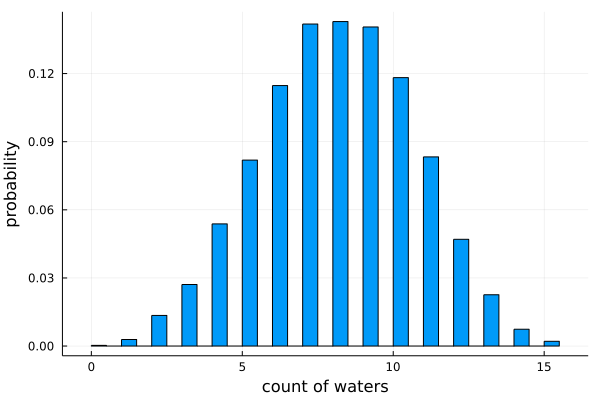

In [60]:
# 3M3
w = [rand(Binomial(15, p)) for p in samples];
props = proportions(w);
println("Probability of 8 waters is $(round(props[9], digits=4))")
histogram(w; legend=false, normalize=:probability, xlabel="count of waters", ylabel="probability")

Probability of 6 waters is 0.1782


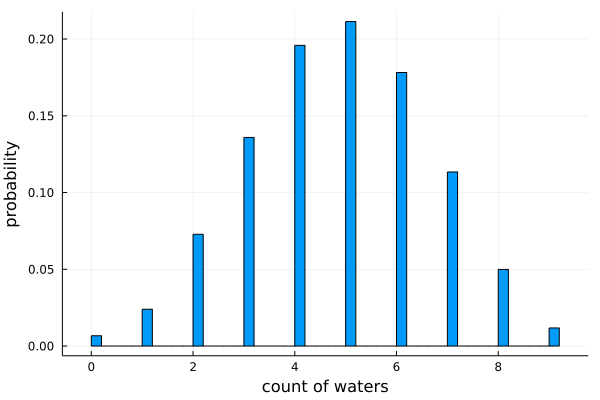

In [61]:
# 3M4
w = [rand(Binomial(9, p)) for p in samples];
props = proportions(w);
println("Probability of 6 waters is $(round(props[7], digits=4))")
histogram(w; legend=false, normalize=:probability, xlabel="count of waters", ylabel="probability")

## 3M5 - step prior

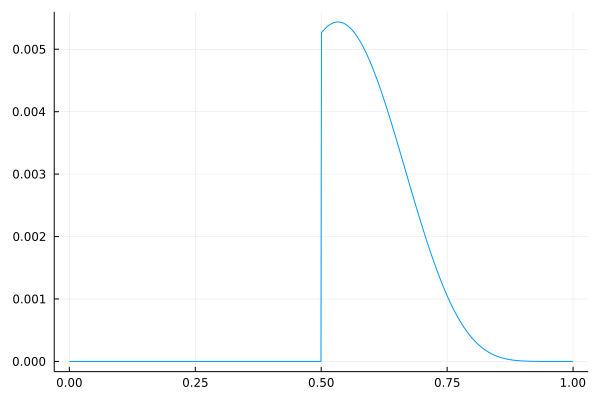

In [67]:
# 3M6
size = 1000
p_grid = range(0, 1; length=size)
prob_p = @. (p_grid >= 0.5) * 1.0
prob_data = [pdf(Binomial(15, p), 8) for p in p_grid];
posterior_step = prob_data .* prob_p
posterior_step /= sum(posterior_step);
plot(p_grid, posterior_step; legend=false)

HPDI(90%): [0.5005005005005005, 0.7137137137137137]


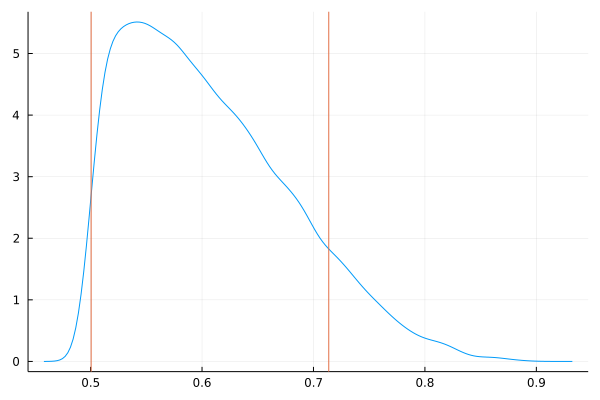

In [68]:
cat = Categorical(posterior_step)
samples_step = p_grid[rand(cat, 10_000)];
h = hpdi(samples_step, alpha=0.1)
println("HPDI(90%): ", h)
density(samples_step)
vline!(h; legend=false)

In [69]:
# validation
hi1, hi2 = findfirst(p_grid .> h[1]), findfirst(p_grid .> h[2])
c = cumsum(posterior_step)
c[hi1], c[hi2]

(0.010536512588894261, 0.90580008967894)

Probability of 8 waters is 0.1728


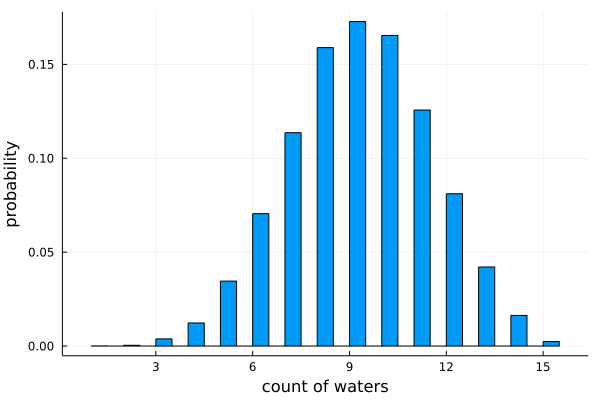

In [70]:
w = [rand(Binomial(15, p)) for p in samples_step];
props = proportions(w);
println("Probability of 8 waters is $(round(props[9], digits=4))")
histogram(w; legend=false, normalize=:probability, xlabel="count of waters", ylabel="probability")

Probability of 6 waters is 0.1807


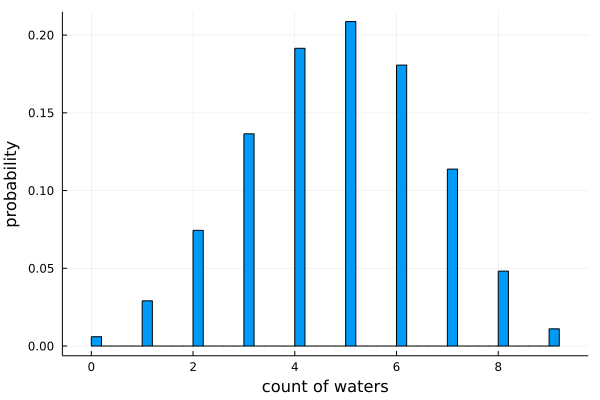

In [71]:
w = [rand(Binomial(9, p)) for p in samples];
props = proportions(w);
println("Probability of 6 waters is $(round(props[7], digits=4))")
histogram(w; legend=false, normalize=:probability, xlabel="count of waters", ylabel="probability")

In [74]:
mean(samples), mean(samples_step)

(0.5298002002002002, 0.6069278278278278)

## 3M6 - 99% percentile

In [113]:
size = 1000
p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);

for tosses ∈ 10:10^5
    waters = div(tosses * 7, 10)
    prob_data = [pdf(Binomial(tosses, p), waters) for p in p_grid];
    posterior = prob_data .* prob_p
    posterior /= sum(posterior);
    cat = Categorical(posterior)
    samples = p_grid[rand(cat, 10_000)];
    h = hpdi(samples, alpha=0.01)
    if h[2] - h[1] < 0.05
        println("Need to do $tosses tosses")
        break
    end
end

Need to do 2119 tosses


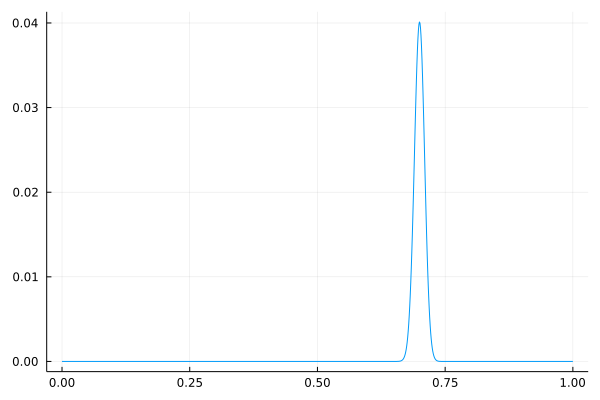

In [114]:
plot(p_grid, posterior; legend=false)

HPDI(99%): [0.6736736736736737, 0.7227227227227228] dist = 0.049049049049049054


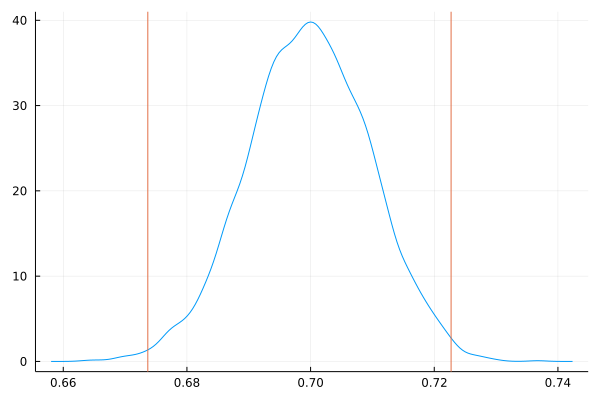

In [115]:
h = hpdi(samples, alpha=0.01)
println("HPDI(99%): ", h, " dist = ", h[2] - h[1])
density(samples)
vline!(h; legend=false)

# Hard problems

Code 3.28

In [11]:
birth1 = [1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1]

birth2 = [0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0];

Code 3.30

In [12]:
sum(birth1) + sum(birth2)

111